In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [38]:
dataset.shape

(10000, 14)

In [39]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [40]:
dataset["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [41]:
# here in iloc the first input is for the rows and the second is for the columns
x = dataset.iloc[:,3:13]
y = dataset["Exited"]

In [42]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [43]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [44]:
# feature engineering
# we are converting the string value in the geography and gender into numeric
geography =pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x["Gender"],drop_first=True)

In [45]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [46]:
x = x.drop(["Geography","Gender"], axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [47]:
pd.concat([x,geography,gender], axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [48]:
# splitting the dataset using the training and testing dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [49]:
x_train.shape

(8000, 8)

In [50]:
x_test.shape

(2000, 8)

In [51]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [53]:
classifer= Sequential()

In [54]:
classifer.add(Dense(units=8, activation="relu"))

In [55]:
classifer.add(Dense(units= 6, activation="relu"))

In [56]:
classifer.add(Dense(units=4, activation='relu'))

In [57]:
classifer.add(Dense(1,activation="sigmoid"))

In [58]:
classifer.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [59]:
model_history= classifer.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 2s 2ms/step - loss: 0.5055 - accuracy: 0.7962 - val_loss: 0.4735 - val_accuracy: 0.7955
Epoch 2/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4480 - accuracy: 0.7964 - val_loss: 0.4493 - val_accuracy: 0.7967
Epoch 3/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4331 - accuracy: 0.7987 - val_loss: 0.4373 - val_accuracy: 0.8016
Epoch 4/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4203 - accuracy: 0.8033 - val_loss: 0.4260 - val_accuracy: 0.8080
Epoch 5/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4035 - accuracy: 0.8253 - val_loss: 0.4057 - val_accuracy: 0.8251
Epoch 6/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.8475 - val_loss: 0.3842 - val_accuracy: 0.8387
Epoch 7/50
536/536 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.8531 - val_loss: 0.3727 - val_accuracy: 0.8466
Epoch 

In [60]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

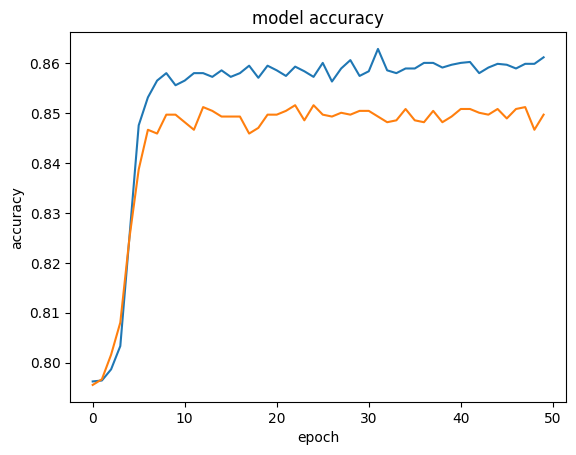

In [61]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [62]:
y_pred = classifer.predict(x_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 734us/step


In [64]:
# checking the accuracy of the model 
from sklearn.metrics import accuracy_score
res = accuracy_score(y_pred, y_test)
res

0.861